# Brief Introduction on ECG and ECG Signals.

Electrocardiography (ECG or EKG) is basically the recording the electrical activity of the heart over a certain period of time. The information can be obtained using the electrodes which are placed over the skin of the body. The electrodes which are placed above the skin detect very small electrical signals that arise from the heart muscles. The cell membranes forming the outer covering of the heart cell have some electrical charge which is depolarized during every heart beat. These signals which are very small are detected and later amplified with the help of ECG monitoring device. (Ref[2]) The signal obtained or graph of voltage versus time produced by the this procedure is referred to as an electrocardiogram.The recording of an ECG on standard paper allows the time taken for the various phases of electrical depolarisation to be measured, usually in milliseconds. There is a recognised normal range for such ‘intervals’: (Ref [3])

1. PR interval (measured from the beginning of the P wave to the first deflection of the QRS complex). Normal range 120 – 200 ms (3 – 5 small squares on ECG paper).
2. QRS duration (measured from first deflection of QRS complex to end of QRS complex at isoelectric line). Normal range up to 120 ms (3 small squares on ECG paper). 
3. QT interval (measured from first deflection of QRS complex to end of T wave at isoelectric line). Normal range up to 440 ms (though varies with heart rate and may be slightly longer in females) 

ECG was invented by William Einthoven in the early 1900’s, the system was too complex, bulky and required a large no. of workforce. Present day ECG devices are compact and portable. 

### Basic steps of ECG:
The 12-Lead ECG has  electrodes which are placed on the patient's limbs and surface of the chest. The overall magnitude of the heart's elctrical potential is measured from 12 different andles and is recorded over a period of 10 seconds. The electrodes are placed on 2 major parts i.e. Chest (Prooximity Electrode Placememnt) and Limb (Extremity Electrode Placement). Electrodes placed are as follows: (Ref [1])

1. V1 - Fourth intercostal space at the right border of the sternum
2. V2 - Fourth intercostal space at the right border of the sternum
3. V3 - Midway between placement of V2&V4
4. V4 - Fifth intercostal space at the midclavicular line
5. V5 - Anterior axillary line on the same horizontal level as V4
6. V6 - Mid-axillary line on the same horizontal level as V4&V5
7. RA (Right Arm) - Anywhere between the right shoulder and right elbow
8. RL (Right Leg) - Anywhere below the right torso and above the right ankle
9. LA(Left Arm) - Anywhere between the left shoulder and the left elbow
10. LL (Left Leg) - Anywhere below the left torso and above the left ankle

Once the electrodes are placed we need to obtain the ECG signals which are observed from these electrodes. It is necessary to understand the nature of the signal. ECG signal consists of low amplitude voltages in the presence of high offsets and noise. The electrodes generate a maximum offset voltage of ±300mV. In addition to this, the system also picks up the 50/60Hz noise from the power lines which form the common mode signal. The amplitude of the power line noise sometimes can be huge and it needs to be filtered. (Ref [2])

### ECG Filtering 
Signal Processing of a ECG is a challenge since the actual signal value is 0.5mV in an offset environment of 300mV. Other factors that affect the accuracy of the signal are the AC power supply interference, RF interference from surgery equipment and other implanted devices like the pace maker and physiological monitoring systems. (Ref [2]) The main source of noise in ECG are:

1.	Baseline Wander (Low Frequency noise)
2.	Power Line Interference (50Hz or 60Hz noise from power lines)
3.	Muscle Noise 
4.	Other Interference (i.e. RF noise from other equipment)

Since the ECG equipment are becoming portable and as the voltages of the equipment are reducing, signal processing has become an important challenge. Implementation of the complete analog front-end processing in a single, mixed-signal controller, and using both integrated hardware and software increases system accuracy and reduces overall power consumption. In this way, developers 
can reduce system cost tremendously.

Due to advancement in the healthcare and also technology, ECG equipment is becoming an important part of the diagnosis process. Advancement in the field of communication and low power circuit design has enabled the development of ECG devices which now are more accurate, easy to carry & operate and also have latest diagnostic features.



 The length of the file is: 43081

 The length of the time array is: 43081
[2072 2072 2070 ..., 2075 2075 2075]


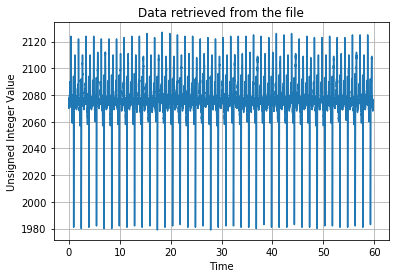

In [1]:
# Now we begin with the program for the given ECG Signal
# Importing the magic command and other files from the python library
%matplotlib inline
from __future__ import division
from scipy import signal
import pandas as pd
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import math
from matplotlib import gridspec

f = open('aami3a.dat','rb')  #opens the ECG signal 

AllSignal = np.fromfile(f,count=-1,dtype=np.uint16) #Reads all the inputs from the file

print('\n The length of the file is: ' + str(len(AllSignal)))

x = np.arange(0,(len(AllSignal))/720.,1/720.) #Arrange according to step size

print('\n The length of the time array is: ' + str(len(x)))

Samples = AllSignal[:43081] # All samples in array

#print Samples

pl.plot(x,AllSignal)
pl.title('Data retrieved from the file')
pl.xlabel('Time')
pl.ylabel('Unsigned Integer Value')    
pl.grid()

We have plotted the provided ECG signal which contain 43081 samples. The ECG signal is sampled at a frequency of 720Hz with 12-bit resolution.


We have to obtain 5 beats in a signal. Therefore to calculate 5 beats in a signal, we will have to calculate the no. of samples required to zoom into the first 5 beats in the signal.

$$ Required Samples = \frac{No. of Seconds}{Sampling time} $$


where, $$ Sampling Time = \frac{1}{Frequency of the signal} $$

Therefore, we need 5040 samples in order to zoom into the first 5 beats in the signal.




 No. of the Samples required to Zoom into first 5 Beats = 5040.0


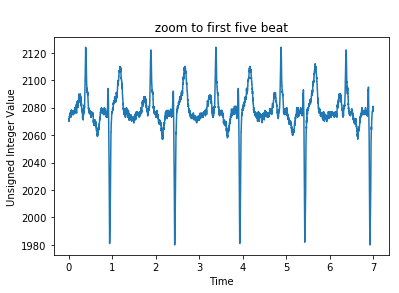

In [2]:
Sampling_time = 1/720.
Req_Samples = 7/Sampling_time
print '\n No. of the Samples required to Zoom into first 5 Beats = ' +str(Req_Samples)

zoom = np.arange(0,Req_Samples/720.,1/720.) #arranging to required samples of zooming to first 5 beats w.r.t. step size
pl.plot(zoom,AllSignal[:int(Req_Samples)])
pl.title('\n zoom to first five beat ')
pl.xlabel('Time')
pl.ylabel('Unsigned Integer Value')


Using the same method used for calculating the no. of samples to zoom into first 5 beats, we calculate the no. of samples required to zoom in the 1 beat in the sample.

Therefore, we need 720 samples to get the 1 beat in the signal.



 No. of the Samples required to Zoom into first Beat = 720.0


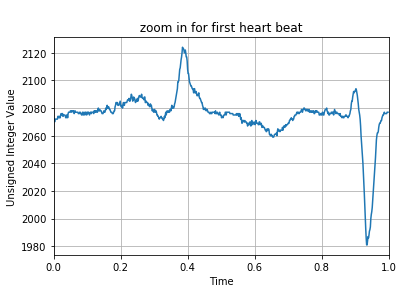

In [3]:
Sampling_time = 1/720.
Req_Samples1 = 1/Sampling_time
print '\n No. of the Samples required to Zoom into first Beat = ' +str(Req_Samples1)


zoom1=np.arange(0,Req_Samples1/720.,1/720.) # arranging to required samples of zooming to 1st beat
pl.plot(zoom1,AllSignal[:int(Req_Samples1)])
pl.title('\n zoom in for first heart beat ' )
pl.xlabel('Time')
pl.ylabel('Unsigned Integer Value')
pl.xlim([0,1])
pl.grid()

In [4]:
Arrange_AllSamples=np.arange(43081) #arranging all samples in the signal
i=0
Signal_Peak=max(AllSignal[:720]) #max of the peak in the first 720 samples of the signal i.e in the 1st beat
print 'QRS peak is ' +str (Signal_Peak)
for index in Arrange_AllSamples:
    if AllSignal[index]>=Signal_Peak:
        i=i+1

print 'No. of QRS Peaks in a signal i.e. Heart beats per minute is ' +str(i) 

QRS peak is 2124
No. of QRS Peaks in a signal i.e. Heart beats per minute is 51


The Peak obtained in the first beat is at 2124. Taking all the peaks above that threshold, we will get the no. of peaks in the signal. The no. of QRS peaks i.e. heart rate is 51 BPM. 

Therefore, when we compare the heart rate of the sample given with the heart rate of a normal human being which is generally between 60 - 100 BPM. The heart rate of this person which is 51 BPM is comparatively lower than the normal heart rate.



43081
Peak in DFT data is 4.98176674504
Peak is observed at frequency (in Hz) of =1.33712184523


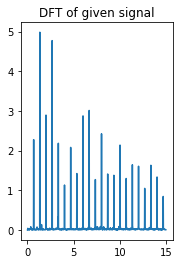

In [16]:
dataF=Samples-np.mean(Samples) #eliminating the dc components
L1=len(dataF)   #length of the data after eliminating the dc components
#we first eliminate dc
print L1
L2 = np.arange(43080/2)
#print L2
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,720/2.,720/43081.)
Y=np.fft.fft(dataF) 
PyyClean=abs(Y)/L
#Zooming into just less than 15
inx=np.where(f>15) #15
inx=inx[0]
pl.subplot(121)
pl.plot(f[:inx[0]], PyyClean[:inx[0]])
pl.title('DFT of given signal')
peak=max(PyyClean[:43081])
print 'Peak in DFT data is ' +str(peak)


for index in L2:
   # print PyyClean[index]
    if PyyClean[index] >=4.98:
        print 'Peak is observed at frequency (in Hz) of =' +str(index/59.83) #Ref [6] relation between samples and frequency which is Nyquist freq of Sampler = half of samples/half of frequency 
        break
        
#BPM = (a - 1)/43081 *720 * 60        
#BPM = (largest_index - 1)/N * Fs * 60

##largest index is the index of the largest peak
## N is the total no. of samples
## Fs is the sampling frequency

After the DFT of the acquired signal we received peak at frequency of 1.337Hz which is highest peak of 4.98

We can clearly see there are large peaks at various frequencies. We observe the large peaks at 1.337 Hz and other peak is at around 2.5 Hz. There are several other peaks in the signal, but there is only one frequency at .337 Hz which is at Maximum. This peak is observed with max 4.98  

We obtained the frequency by first checking the maximum of all peaks in the signal. Once we obtain the max peak, we will have to find the frequency w.r.t. to the relation between the samples and frequency. We get this relation by dividing half of the samples (43081/2) by half of the sampling frequency (720/2). We use the value obtained in samples per secs to obtain the frequency of the maximum of the peak.

Filters are usually used to remove frequencies from the recorded electrograms. For eg., To remove 60 Hz of noise we apply low pass filter of 50 Hz, this removes any frequency above 50Hz from the signal. Therefore, any amplitude associated with these frequencies would be removed resulting in a straight line with little interference. (Ref [7])

Similarly, when we use high pass filter, frequency below the cut-off frequency gets attenuated. This affects the width and amplitude of the signal. It is important to understand the difference in how filters affect the different signals. (Ref[7])

We can therefore come to a conclusion that the effects in the amplitude of the signal depends on the filter settings and the cut-off frequency used to filter the signal.

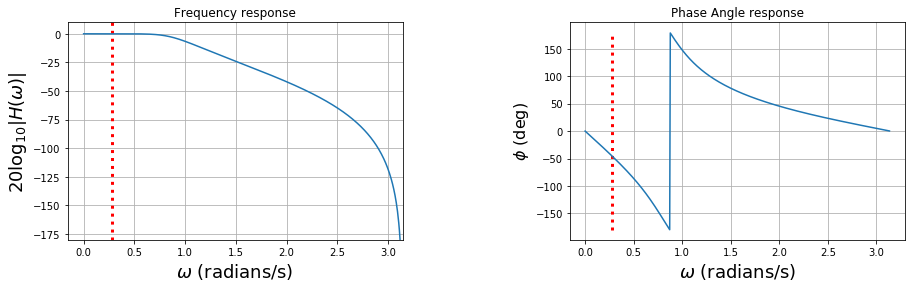

In [14]:
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

fs=720      # sampling frequency
NF=fs/2     # According to Nyquist Theorem, Sampling frequency is 2*max frequency
CF= 100     # Cutoff frequency of 100 Hz
Wn=CF/NF    # Ref [4] Cutoff frequency for digital filters which lies between 0 and 1
b,a=signal.butter(4,Wn,btype='low',analog= False) #Ref [5] butterworth filter 
w,h=signal.freqz(b,a) #impulse response of the above filter
Butter_Filtering=signal.lfilter(b,a,dataF) #filterng the signal
x=np.arange(0,43081/720.,1/720.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency response')
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase Angle response')
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()


In [15]:
#explain the butterworth filter and give details of the ref and all.

Peak in DFT data is 4.9816013693
Maximum is observed at f=1.33712184523


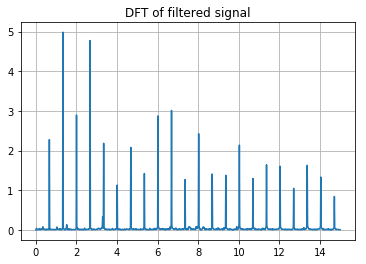

In [20]:
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

LL=len(Filtering)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
ff=np.arange(0,720/2,720/43080.)
YY=np.fft.fft(Butter_Filtering) #find the fft of the butterworth filtered signal
Pyy=abs(YY)/LL

indx=np.where(ff>15)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('DFT of filtered signal')
ax.grid()

p=np.amax(Pyy[:21540])
print 'Peak in DFT data is ' +str(p)
L2=np.arange(21540)
for index in L2:
    if Pyy[index]>=4.98:
        print 'Maximum is observed at f=' +str(index/59.83)  
        break 

In [ ]:
Bibliography 
[1] 2-Lead ECG Placement by EMTRESOURCE.COM (http://www.emtresource.com/resources/ecg/12-lead-ecg-placement/) 

[2] “Accurate ECG Signal Processing” by Ajay Bharadwaj, Applications Engineer Sr, and Umanath Kamath, Contingent Workforce, Cypress Semiconductor Corp. Published in EE Times Design (http://www.eetimes.com/document.asp?doc_id=1278571)

[3] How to read an Electrocardiogram (ECG). Part One: Basic principles of the ECG. The normal ECG
    Author(s): Dr Dallas Price(http://www.southsudanmedicaljournal.com/archive/may-2010/how-to-read-an-electrocardiogram-ecg.-part-one-basic-principles-of-the-ecg.-the-normal-ecg.html)

[4] https://www.mathworks.com/help/signal/ref/butter.html#inputarg_Wn

[5] https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html    

[6] C. E. Shannon, "Communication in the presence of noise", Proc. Institute of Radio Engineers, vol. 37, no.1, pp. 10–21, Jan. 1949. Reprint as classic paper in: Proc. IEEE, Vol. 86, No. 2, (Feb 1998)
    
[7] http://www.theeplab.com/B-The-Members-Center/A000-Electrograms/A-Electrograms/D-Signal-Filters/DA30-Signal-Filtering.php   